<a href="https://colab.research.google.com/github/JoshCast777/WordCloud_Python/blob/WordCloud_2/WordCloud_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nube de Palabras
-----
Se genera la nube de palabras con los datos cogidos al hacer momento de hacer el web scraping.

120346
              Etiquetas Votos
0            javascript    20
1            responsive     1
2                github     0
3                 lista     0
4            algoritmos    14
5                  json     1
6                 mysql     0
7                 numpy     0
8                 array    11
9         visual-studio     1
10           phpmyadmin     0
11               opencv     0
12                 sort     7
13        mostrar-modal     1
14           html-tabla     0
15              archivo     0
16         ordenamiento     7
17                modal     1
18          react-redux     0
19             matrices     0
20                 html     4
21                regex     0
22                  npm     0
23                float     0
24                  css     4
25                tipos     0
26             callback     0
27              parsear     0
28               string     3
29  conversión-de-tipos     0
30                html5     0
31            bucle-for     0
32 

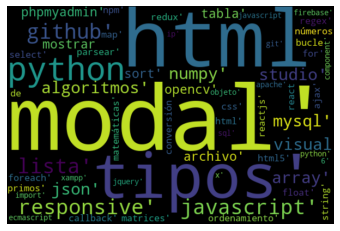

In [11]:
#Se importan las librerías
import requests as rq
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bs4 import BeautifulSoup as bs

#Se crean las listan que contendrán los valores
tg=list()
vt=list()
#Se pide al usuario el ID

id=input()

#Se carga la página
url='https://es.stackoverflow.com/users/'+id+'?tab=tags&sort=votes&page=1'
page=rq.get(url)
soup=bs(page.content, 'html.parser')

#Se cargan las etiquetas y votos
tags=soup.find_all('a', class_='post-tag')
votes=soup.find_all('div', class_='answer-votes')

#Se guarda cada etiqueta y voto en sus respectivas listas.
for i in tags:
  tg.append(i.text)
for i in votes:
  vt.append(i.text)
if len(tg)!=len(vt):
  tg.pop(0)

#Se muestran los valores en una tabla
df=pd.DataFrame({'Etiquetas': tg, 'Votos': vt})
print(df)

#Se debe transformar la columna de etiquetas a un string
text=df['Etiquetas'].values

#Se crea la nube de palabras
wordcloud=WordCloud(width=600, height=400).generate(str(text))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()